In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Filter out FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [60]:
filepath = r"C:\Users\ejiro\Downloads\medical_examination.csv"
df = pd.read_csv(filepath)

In [39]:
df.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

-- Add an overweight column to the DataFrame.
To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their 
height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for 
overweight.

In [61]:
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2)) > 25
df['overweight'] = df['overweight'].astype(int)


In [56]:
df['cholesterol'].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [5]:
# Calculate BMI for each individual
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2

# Check if BMI is greater than 25
df['overweight'] = (df['bmi'] > 25).astype(int)

# Drop the temporary BMI column
df.drop(columns=['bmi'], inplace=True)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
If the value is more than 1, make the value 1.

In [62]:
df['cholesterol'].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [63]:
# Replace values of 1 with 0, and values greater than 1 with 1 for 'cholesterol' column
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1 if x > 1 else x)

# Replace values of 1 with 0, and values greater than 1 with 1 for 'gluc' column
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1 if x > 1 else x)

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


This code snippet applies a lambda function to each value in the 'cholesterol' and 'gluc' columns, replacing values of 1 with 0
and values greater than 1 with 1. The resulting DataFrame will have the 'cholesterol' and 'gluc' columns normalized according
to the specified criteria.


Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's 
catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like

In [64]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [9]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [12]:
df_cat = pd.melt(df, id_vars='cardio', value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat.head()              

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


In [13]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
df_cat = pd.DataFrame(df_cat.groupby(['variable', 'value', 'cardio'])['value'].count()).rename(columns={'value': 'total'}).reset_index()
df_cat.head()

,variable,value,cardio,total
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080


In [85]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename
# one of the collumns for the catplot to work correctly.
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index()
df_cat = df_cat.rename(columns={0: 'total'})
df_cat.head()

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


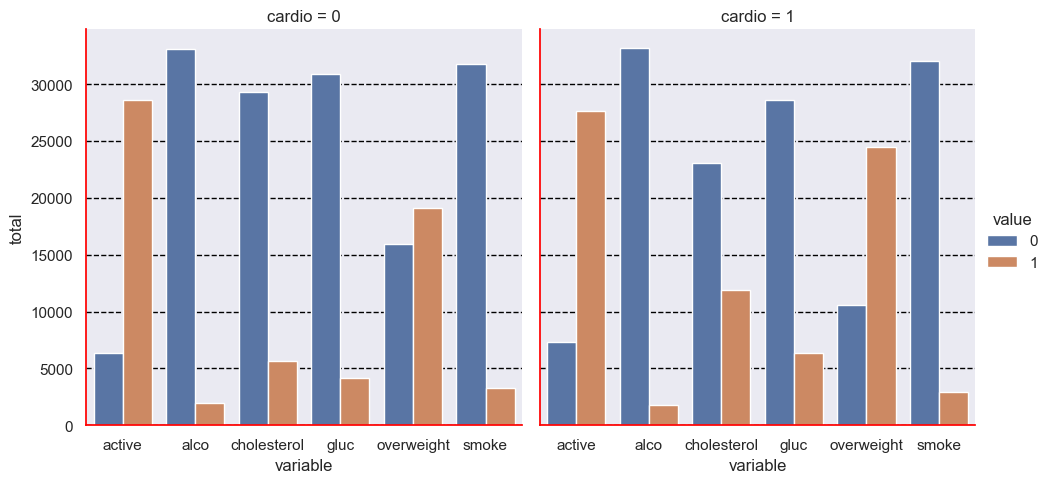

In [95]:
import seaborn as sns

# Convert the 'value' column to strings
df_cat['value'] = df_cat['value'].astype(str)

# Plot the chart using seaborn's catplot & flex a bit
custom = {"axes.edgecolor": "red", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("darkgrid", rc = custom)
#sns.set_theme(style="ticks") 
graph = sns.catplot(data=df_cat, kind="bar", x="variable", y="total", hue="value", col="cardio")
fig = graph.fig


In [97]:
fig.savefig('catplot.png')

In [98]:
df.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight'],
      dtype='object')

In [107]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
            (df['height'] >= df['height'].quantile(0.025)) &
            (df['height'] <= df['height'].quantile(0.975)) &
            (df['weight'] >= df['weight'].quantile(0.025)) &
            (df['weight'] <= df['weight'].quantile(0.975))
            ]
            
            
            
            

In [109]:
df_heat.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


<Axes: >

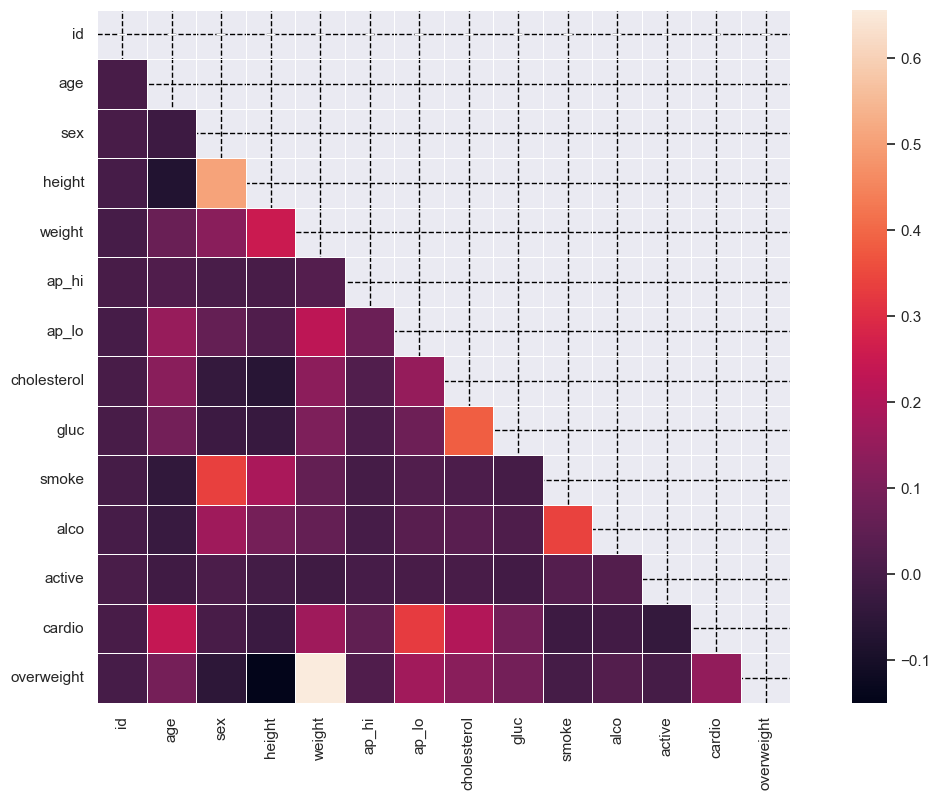

In [117]:
# Calculate the correlation matrix
corr = df_heat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 9))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, mask=mask, square=True, linewidths=0.5, annot=True, fmt="0.1f")